In [409]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch
%matplotlib inline
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.16f}'.format

$f(x) = x^2\cos(x) + x\sin(x)$

In [410]:
def F(x: float) -> float:
    return x**2 * np.cos(x) + x * np.sin(x)

$\displaystyle\int f(x)\ dx = (x^2-1)\sin(x) + x\cos(x) + c$

In [411]:
def IF(x: float) -> float:
    return (x**2 - 1) * np.sin(x) + x * np.cos(x)

$p_0(x) = 2$


In [412]:
def P0(x: float) -> float:
    return 2

$\displaystyle\int p_0(x)\ dx = 2x + c$ 

In [413]:
def IP0(x: float) -> float:
    return 2 * x

$p_1(x) = x+1$


In [414]:
def P1(x: float) -> float:
    return x + 1

$\displaystyle\int p_1(x)\ dx = \frac{x^2}{2} + x + c$

In [415]:
def IP1(x: float) -> float:
    return x ** 2 / 2 + x

$p_2(x) = 3x^2 - 2$

In [416]:
def P2(x: float) -> float:
    return 3 * x ** 2 - 2

$\displaystyle\int p_2(x)\ dx = x^3 - 2x + c$

In [417]:
def IP2(x: float) -> float:
    return x ** 3 - 2 * x

$p_3(x) = 4x^3 - 3x^2 + 2x$

In [418]:
def P3(x: float) -> float:
    return 4 * x ** 3 - 3 * x ** 2 + 2 * x

$\displaystyle\int p_3(x)\ dx = x^4 - x^3 + x^2$

In [419]:
def IP3(x: float) -> float:
    return x ** 4 - x ** 3 + x ** 2

Адаптированные квадратурные формулы

In [420]:
def getSum(f, a: float, b: float, n: int) -> float:
    h = (b - a) / n
    return sum([f(a + i * h) for i in range(1, n)])


def KFL(f, s: float, a: float, b: float, n: int) -> float:
    return (f(a) + s) * (b - a) / n


def KFR(f, s: float, a: float, b: float, n: int) -> float:
    return (s + f(b)) * (b - a) / n


def KFM(f, s: float, a: float, b: float, n: int) -> float:
    h = (b - a) / n
    return sum([f(a + i * h + h / 2) for i in range(n)]) * (b - a) / n


def KFT(f, s: float, a: float, b: float, n: int) -> float:
    return (f(a) + 2 * s + f(b)) * (b - a) / (2 * n)


def KFS(f, s: float, a: float, b: float, n: int) -> float:
    h = (b - a) / n
    sMid = sum([f(a + (2 * i + 1) * h / 2) for i in range(n)])
    return (f(a) + 2 * s + 4 * sMid + f(b)) * h / 6

In [421]:
def printGraph(f, a: float, b: float, expected: float, n: int, name: str, res: float):

    ptsnum = 1000
    ep = (b - a) / 4

    X = np.linspace(a - ep, b + ep, ptsnum)
    y = [f(x) for x in X]
    Ox = [0 for _ in X]

    fig, ax = plt.subplots()
    ax.plot(X, y, color="blue", alpha=0.5, label=f"{f.__name__}(x)")
    ax.plot(X, Ox, color="black")

    X = [x for x in X if a <= x <= b]
    y = [f(x) for x in X]
    Xaxis = [0 for _ in X]

    h = (b - a) / n

    figures = []

    if (name == "KFL"):
        for i in range(n):
            c = a + i * (b - a) / n
            elem = ((c, 0), (c, f(c)), (c+h, f(c)), (c+h, 0))
            figures.append(elem)
    elif (name == "KFR"):
        for i in range(n):
            c = a + i * (b - a) / n
            elem = ((c, 0), (c, f(c + h)), (c+h, f(c + h)), (c+h, 0))
            figures.append(elem)
    elif (name == "KFM"):
        for i in range(n):
            c = a + i * (b - a) / n
            elem = ((c, 0), (c, f(c + h / 2)), (c+h, f(c + h / 2)), (c+h, 0))
            figures.append(elem)
    elif (name == "KFT"):
        for i in range(n):
            c = a + i * (b - a) / n
            elem = ((c, 0), (c, f(c)), (c+h, f(c + h)), (c+h, 0))
            figures.append(elem)

    ax.add_patch(ptch.Polygon(figures[0], edgecolor="#1207ff", facecolor="#1207ff", 
                                        fill=True, alpha=0.2, label=f"{round(res, 3)}"))       

    figures.remove(figures[0])
    
    [ax.add_patch(ptch.Polygon(figure, edgecolor="#1207ff", facecolor="#1207ff", 
                                        fill=True, alpha=0.2)) for figure in figures]

    ax.fill_between(X, Xaxis, y, facecolor="red", alpha=0.2, label=f"{round(expected, 3)}")
    ax.vlines(a, min(f(a), 0), max(f(a), 0), color="blue", alpha=0.2, linestyle="--")
    ax.vlines(b, min(f(b), 0), max(f(b), 0), color="blue", alpha=0.2, linestyle="--")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()

    plt.show()


def getGraph(f, If, formula, a: float, b: float, n: int):
    Sum = getSum(f, a, b, n)
    Res = formula(f, Sum, a, b, n)
    Expected = If(b) - If(a)
    printGraph(f, a, b, Expected, n, formula.__name__, Res)


def getData(f, If, a: float, b: float, n: int):
    Sum = getSum(f, a, b, n)
    Expected = If(b) - If(a)
    Results = [If(b) - If(a), KFL(f, Sum, a, b, n), KFR(f, Sum, a, b, n), 
                        KFM(f, Sum, a, b, n), KFT(f, Sum, a, b, n), KFS(f, Sum, a, b, n)]
    data = {
        "Значение": Results,
        "Погрешность": [abs(Expected - result) for result in Results]
    }
    df = pd.DataFrame(data, index=["Значение интеграла", "СКФ левых прямоугольников", 
                        "СКФ правых прямоугольников", "СКФ средних прямоугольников",
                        "СКФ трапеций", "СКФ Симпсона"])
    print(df)


Входные данные:

In [432]:
a_ = -2
b_ = 2
n_ = 10

Графики:

СКФ левых прямоугольников для $f(x)$

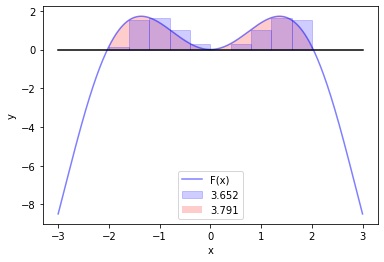

In [434]:
getGraph(F, IF, KFL, a_, b_, n_)

СКФ правых прямоугольников для $f(x)$

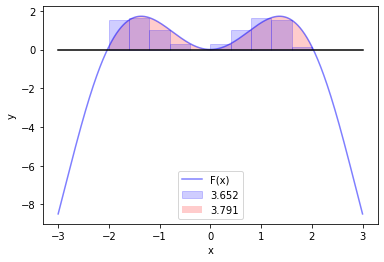

In [435]:
getGraph(F, IF, KFR, a_, b_, n_)

СКФ средних прямоугольников для $f(x)$

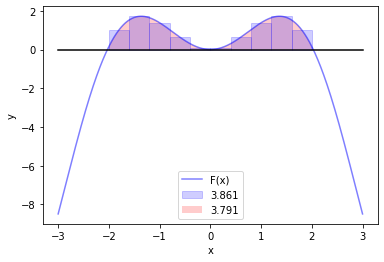

In [436]:
getGraph(F, IF, KFM, a_, b_, n_)

СКФ трапеций для $f(x)$

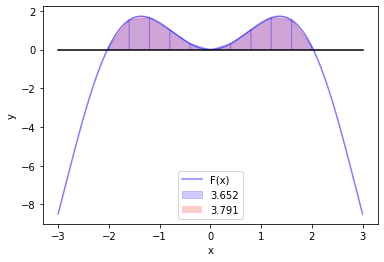

In [437]:
getGraph(F, IF, KFT, a_, b_, n_)

Значения СКФ и их абсолютная фактическая погрешность для $f(x)$

In [438]:
getData(F, IF, a_, b_, n_)

                                      Значение        Погрешность
Значение интеграла          3.7911972147655204 0.0000000000000000
СКФ левых прямоугольников   3.6517816590234511 0.1394155557420693
СКФ правых прямоугольников  3.6517816590234511 0.1394155557420693
СКФ средних прямоугольников 3.8609378369573357 0.0697406221918153
СКФ трапеций                3.6517816590234511 0.1394155557420693
СКФ Симпсона                3.7912191109793736 0.0000218962138532


Значения СКФ и их абсолютная фактическая погрешность для $p_0(x)$

In [439]:
getData(P0, IP0, a_, b_, n_)

                                      Значение        Погрешность
Значение интеграла          8.0000000000000000 0.0000000000000000
СКФ левых прямоугольников   8.0000000000000000 0.0000000000000000
СКФ правых прямоугольников  8.0000000000000000 0.0000000000000000
СКФ средних прямоугольников 8.0000000000000000 0.0000000000000000
СКФ трапеций                8.0000000000000000 0.0000000000000000
СКФ Симпсона                8.0000000000000000 0.0000000000000000


Значения СКФ и их абсолютная фактическая погрешность для $p_1(x)$

In [440]:
getData(P1, IP1, a_, b_, n_)

                                      Значение        Погрешность
Значение интеграла          4.0000000000000000 0.0000000000000000
СКФ левых прямоугольников   3.2000000000000006 0.7999999999999994
СКФ правых прямоугольников  4.8000000000000007 0.8000000000000007
СКФ средних прямоугольников 4.0000000000000000 0.0000000000000000
СКФ трапеций                4.0000000000000009 0.0000000000000009
СКФ Симпсона                4.0000000000000009 0.0000000000000009


Значения СКФ и их абсолютная фактическая погрешность для $p_2(x)$

In [441]:
getData(P2, IP2, a_, b_, n_)

                                      Значение        Погрешность
Значение интеграла          8.0000000000000000 0.0000000000000000
СКФ левых прямоугольников   8.3200000000000021 0.3200000000000021
СКФ правых прямоугольников  8.3200000000000021 0.3200000000000021
СКФ средних прямоугольников 7.8400000000000016 0.1599999999999984
СКФ трапеций                8.3200000000000021 0.3200000000000021
СКФ Симпсона                8.0000000000000018 0.0000000000000018


Значения СКФ и их абсолютная фактическая погрешность для $p_3(x)$

In [442]:
getData(P3, IP3, a_, b_, n_)

                                        Значение         Погрешность
Значение интеграла          -16.0000000000000000  0.0000000000000000
СКФ левых прямоугольников   -30.7199999999999989 14.7199999999999989
СКФ правых прямоугольников   -1.9199999999999988 14.0800000000000018
СКФ средних прямоугольников -15.8400000000000034  0.1599999999999966
СКФ трапеций                -16.3200000000000003  0.3200000000000003
СКФ Симпсона                -16.0000000000000000  0.0000000000000000
